In [52]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc
from warnings import filterwarnings
filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [54]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [55]:
df=pd.read_json('dfObs_a01_v02.json');
df=df.sort_index();
len(df)
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [56]:
df.head()

,sents,chapter,entities,chunks,label
0,Chapter 1,1.0,[],[Chapter],0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1.0,[],"[the distinction, the first motion, the second or proper motions, the proper motions, the second inequality]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1.0,[],"[The testimony, the ages, the motions, the planets]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1.0,[],"[Reason, experience, their gyrations, perfect circles]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1.0,[],"[figures, it, circles, bodies]",0


In [57]:
df.tail()

,sents,chapter,entities,chunks,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[('Mars', 'PLAN'), ('opposition', 'ASTR'), ('Mars', 'PLAN'), ('Earth', 'PLAN'), ('Sun', 'PLAN'), ('17 hours 20 minutes', 'TIME'), ('Mars', 'PLAN'), ('eastward', 'ASTR'), ('16\' 20""', 'LONG'), ('Sun', 'PLAN'), ('42\' 18""', 'LONG')]","[the position, Mars, opposition, Kepler, the angular distance, Mars, Earth—, the place, the Sun—, 17 hours, Mars, the Sun]",1
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[('longitude', 'ASTR'), ('Mars', 'PLAN'), ('opposition', 'ASTR'), ('198° 37\' 50""', 'LONG'), ('Mars', 'PLAN'), ('orbit', 'ASTR'), ('198° 37\' 10""', 'LONG'), ('18° 37\' 10"" Libra', 'LONG')]","[Kepler, the longitude, Mars, opposition, he, order, Mars's orbit, he, ' 10"" Libra]",1
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[('Sun', 'PLAN'), ('longitude', 'ASTR'), ('observation', 'ASTR'), ('Mars', 'PLAN')]","[The Sun, its longitude, the time, observation, its position, Mars]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[('opposition', 'ASTR'), ('17 hours 20 minutes', 'TIME'), ('March 29', 'DATE'), ('observation', 'ASTR')]","[the time, opposition, 17 hours, March, the observation]",1
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[('opposition', 'ASTR'), ('March 28', 'DATE'), ('4h 23m', 'TIME')]","[Kepler, the time, opposition, March]",1


In [58]:
X = list(df["sents"])

In [59]:
y = np.array(list(df["label"]))

# Distribution of Samples 

In [60]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [61]:
count

{0: 5590, 1: 1109}

Text(0.5, 1.0, 'Distribution of samples over different classes')

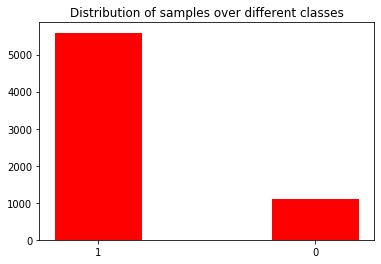

In [62]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [63]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [64]:
#-Random Forest Classifier
trial= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ))])
####################################################
## 01-Random Forest Classifier with weights
class_weight = dict({0:.0069, 1:700000})
trial_01= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ,class_weight=class_weight))])
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [65]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [66]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

## 1- Random Forest 

In [67]:
trial.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [68]:
y_pred=trial.predict(X_test)

In [69]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1384   21]
 [ 112  158]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.95      1405
           1       0.88      0.59      0.70       270

   micro avg       0.92      0.92      0.92      1675
   macro avg       0.90      0.79      0.83      1675
weighted avg       0.92      0.92      0.91      1675



In [70]:
cross_validation_accuracy(trial,X,y,cv=10)

[0.92238806 0.91492537 0.93134328 0.9238806  0.91791045 0.90149254
 0.89552239 0.91940299 0.92835821 0.9103139 ]
Accuracy of : 0.917 ± 0.022


In [71]:
y_pred = cross_val_predict(trial, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5590
           1       0.89      0.57      0.69      1109

   micro avg       0.92      0.92      0.92      6699
   macro avg       0.90      0.78      0.82      6699
weighted avg       0.91      0.92      0.91      6699

[[5510  479]
 [  80  630]]


In [72]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


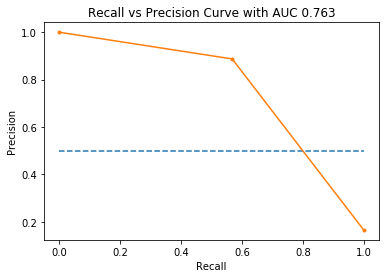

AUC: 0.763


In [73]:
plot_pr(recall, precision)

## 1-SGD

In [74]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [75]:
y_pred=trial_05.predict(X_test)

In [76]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1369   36]
 [  59  211]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1405
           1       0.85      0.78      0.82       270

   micro avg       0.94      0.94      0.94      1675
   macro avg       0.91      0.88      0.89      1675
weighted avg       0.94      0.94      0.94      1675



In [77]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[0.95671642 0.93880597 0.93880597 0.93880597 0.95373134 0.92537313
 0.93731343 0.94477612 0.95522388 0.92376682]
Accuracy of : 0.941 ± 0.022


In [78]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5590
           1       0.85      0.78      0.81      1109

   micro avg       0.94      0.94      0.94      6699
   macro avg       0.91      0.88      0.89      6699
weighted avg       0.94      0.94      0.94      6699



In [79]:
print(cm)

[[5442  247]
 [ 148  862]]


In [80]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


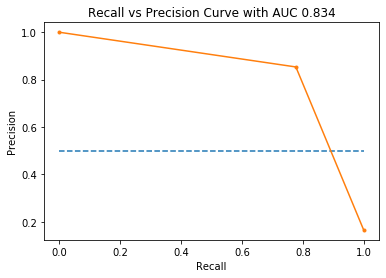

AUC: 0.834


In [81]:
plot_pr(recall, precision)

In [82]:
from eli5 import show_weights
show_weights(trial_05, top=30)

Weight?,Feature
+3.919,28
+3.807,24
+3.679,hours
+3.560,48
+3.483,29
+3.465,37
+3.392,50
+3.328,27
+3.292,30
+3.210,53


In [83]:
index_0=list(np.where(y==0))
index_1=list(np.where(y==1))
idx_0=index_0[0].tolist();
idx_1=index_1[0].tolist();

In [84]:
import eli5
eli5.show_prediction(clf, X[idx_1[5]],vec=vec)

In [85]:
eli5.show_prediction(clf, X[idx_1[7]],vec=vec)

In [86]:
eli5.show_prediction(clf, X[idx_0[0]],vec=vec)

In [87]:
eli5.show_prediction(clf, X[idx_0[1]],vec=vec)

# Parameter tununed SGD

In [89]:
param_grid_01= {
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e-1, 1e2, 1e3], # learning rate
    'clf__max_iter': [1000], # number of epochs
    'clf__penalty': ['l2'],
    'clf__loss': ['hinge','log'],
    'clf__n_jobs': [-1],
     'clf__tol': [1e-4, 1e-3, 1e-2]
}
trial_05_01 = GridSearchCV(trial_05, param_grid=param_grid_01, cv=5, n_jobs=-1, verbose=2)

In [90]:
trial_05_01.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 0.1, 100.0, 1000.0], 'clf__max_iter': [1000], 'clf__penalty': ['l2'], 'clf__loss': ['hinge', 'log'], 'clf__n_jobs': [-1], 'clf__tol': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [91]:
y_pred=trial_05_01.predict(X_test)

In [92]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)

[[1373   32]
 [  66  204]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1405
           1       0.86      0.76      0.81       270

   micro avg       0.94      0.94      0.94      1675
   macro avg       0.91      0.87      0.89      1675
weighted avg       0.94      0.94      0.94      1675



In [93]:
cross_validation_accuracy(trial_05_01,X,y,cv=10)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.6s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


[0.94776119 0.94328358 0.94925373 0.93880597 0.95522388 0.92686567
 0.93432836 0.94776119 0.95970149 0.92376682]
Accuracy of : 0.943 ± 0.022


In [94]:
y_pred = cross_val_predict(trial_05_01, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.6s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.9s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5590
           1       0.85      0.78      0.81      1109

   micro avg       0.94      0.94      0.94      6699
   macro avg       0.90      0.88      0.89      6699
weighted avg       0.94      0.94      0.94      6699



In [95]:
print(cm)

[[5439  244]
 [ 151  865]]
